In [3]:
import os
import re
import copy
import collections 

import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

import nltk
from tokenizer import Tokenizer


In [4]:
from nltk.tokenize import word_tokenize, WordPunctTokenizer, TreebankWordTokenizer,sent_tokenize
from nltk.corpus import stopwords  
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [5]:
def lemmatize_all(sentence):
    word_list=[]
    wnl = WordNetLemmatizer()
    for word, tag in pos_tag(word_tokenize(sentence)):
        if tag.startswith("NN"):
            word_list.append(wnl.lemmatize(word, pos='n'))
        elif tag.startswith('VB'):
            word_list.append(wnl.lemmatize(word, pos='v'))
        elif tag.startswith('JJ'):
            word_list.append(wnl.lemmatize(word, pos='a'))
        else:
            word_list.append(word)
    
    return word_list

In [6]:
data_dir = os.path.join(os.getcwd(), "Dataset")

def read_data(f_name):
    data = pd.read_csv(os.path.join(data_dir, f_name))
    sentences = [clean_str(s) for s in data["Sentence"]]
    categories = data["Category"]
    return sentences, categories
    # return data

def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Every dataset is lower cased except for TREC
    """
    string = string.lower()
    string = re.sub(r"[^A-Za-z0-9,!?\'\`\.]", " ", string)
    string = re.sub("\s+"," ", string)
    string = re.sub(r"\.{3}", " ...", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\?", " ? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    word_lemma=lemmatize_all(string)
    string = ' '.join(word_lemma)
    string = re.sub(r'\s+\w{1}\b','',string)
    # string = re.sub(r"")
    return string.strip().lower()

In [5]:
sents, cates = read_data("train_final.csv")

tokenizer = Tokenizer()
lenth = []
for sent in sents:
    lenth.append(len(tokenizer(sent)))
print("max : {}".format(max(lenth)))
print("min : {}".format(min(lenth)))

lenth = []
for sent in sents:
    lenth.append(len(clean_str(sent)))
    if len(clean_str(sent)) == 4:
        print(clean_str(sent))
        print(sent)
print("max : {}".format(max(lenth)))
print("min : {}".format(min(lenth)))


max : 53
min : 2
go .
go .
eh .
eh .
max : 275
min : 4


In [7]:
delimiter = [" ?", " !", " ."]
sentence_cnt = []
for sent in sents:
    cleaned_s = clean_str(sent)
    cnt = sum(cleaned_s.count(deli) for deli in delimiter)
    sentence_cnt.append(cnt)
    # if cnt ==0:
        # print(sent)
        # print(cleaned_s)
print("max : {}".format(max(sentence_cnt)))
print("min : {}".format(min(sentence_cnt)))

max : 4
min : 0


In [8]:

dt_df = pd.read_csv(os.path.join(data_dir, "train_final.csv"))
dt_df.head()

,Id,Category,Sentence
0,0,3,-LRB- The film -RRB- tackles the topic of rela...
1,1,2,"Lavishly , exhilaratingly tasteless ."
2,2,4,It is also beautifully acted .
3,3,1,"But , like Silence , it 's a movie that gets u..."
4,4,2,It 's been made with an innocent yet fervid co...


In [9]:
cleaned_df = copy.deepcopy(dt_df)
cleaned_df["Sentence"] = [clean_str(s) for s in dt_df["Sentence"]]
cleaned_df.head()

,Id,Category,Sentence
0,0,3,lrb the film rrb tackles the topic of relation...
1,1,2,"lavishly , exhilaratingly tasteless ."
2,2,4,it is also beautifully acted .
3,3,1,"but , like silence , it 's a movie that gets u..."
4,4,2,it 's been made with an innocent yet fervid co...


Text(0, 0.5, 'Frequency')

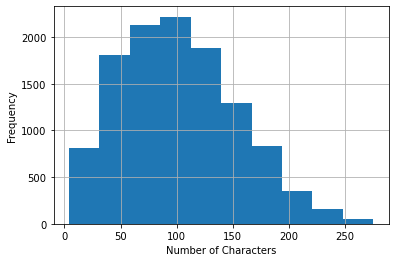

In [10]:
# 글자 수 히스토그램 
ax = cleaned_df['Sentence'].str.len().hist()
ax.set_xlabel('Number of Characters')
ax.set_ylabel('Frequency')


Text(0, 0.5, 'Frequency')

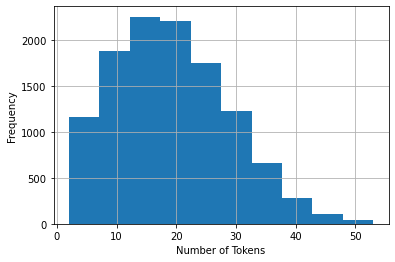

In [11]:
# 토큰 수 히스토그램 
ax = cleaned_df['Sentence'].str.split().map(lambda x: len(x)).hist()
ax.set_xlabel('Number of Tokens')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

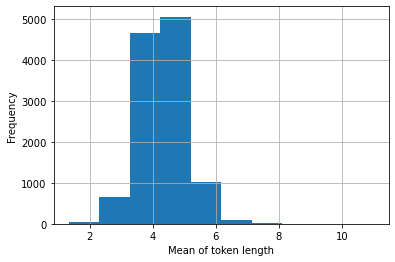

In [12]:
# 토큰 길이 평균
ax = cleaned_df['Sentence'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
ax.set_xlabel('Mean of token length')
ax.set_ylabel('Frequency')

<AxesSubplot:>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


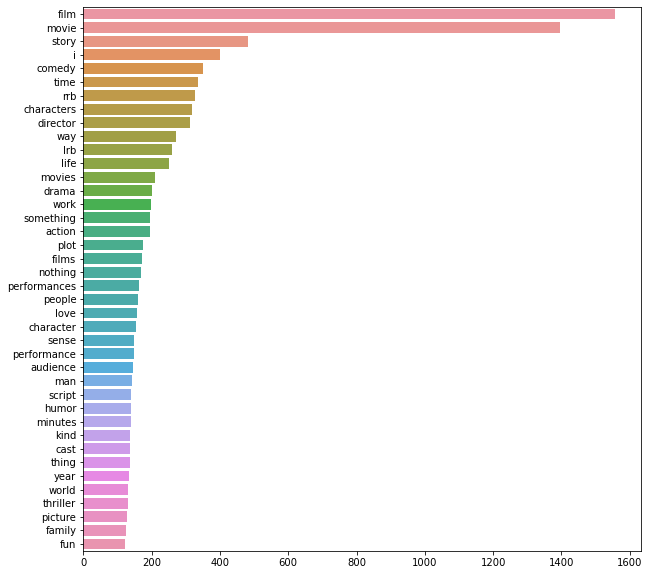

In [14]:
# 명사별 개수 
# 명사 추출 > 전체 코퍼스로 구축 > 개수 세기 > 시각화
sent_ls = cleaned_df['Sentence'].to_list()

is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
tokenizer = Tokenizer("nltk")
nouns = [word for sent in sent_ls for (word, pos) in nltk.pos_tag(tokenizer(sent)) if is_noun(pos)] 

count = collections.Counter(nouns) 
most = count.most_common() #빈도 수 순으로 추출 

x, y= [], [] 
for word,count in most[:40]:
    x.append(word)
    y.append(count)

plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x)